In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fear = pd.read_csv(r"C:\Users\Dell\Downloads\fear_greed_index.csv")
historical = pd.read_csv(r"C:\Users\Dell\Downloads\historical_data.csv")

In [3]:
print(fear.shape)
print(historical.shape)

(2644, 4)
(211224, 16)


In [4]:
print(fear.columns)
print(historical.columns)

Index(['timestamp', 'value', 'classification', 'date'], dtype='object')
Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')


In [5]:
print(fear.isnull().sum())
print(historical.isnull().sum())

timestamp         0
value             0
classification    0
date              0
dtype: int64
Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64


In [6]:
print(fear.duplicated().sum())
print(historical.duplicated().sum())

0
0


In [7]:
fear['date'] = pd.to_datetime(fear['date'])
fear['date'] = fear['date'].dt.date

In [9]:
historical['Timestamp IST'] = pd.to_datetime(
    historical['Timestamp IST'],
    dayfirst=True,
    errors='coerce'
)
historical['date'] = historical['Timestamp IST'].dt.date

In [10]:
merged = historical.merge(fear, on='date', how='left')

In [11]:
merged.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,timestamp,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed


In [12]:
daily_pnl = merged.groupby(['Account','date'])['Closed PnL'].sum().reset_index()

In [13]:
merged['win'] = merged['Closed PnL'] > 0

win_rate = merged.groupby('Account')['win'].mean().reset_index()
win_rate.rename(columns={'win':'Win Rate'}, inplace=True)

In [14]:
trades_per_day = merged.groupby('date')['Trade ID'].count().reset_index()

In [15]:
long_short = merged.groupby(['date','Side']).size().unstack()

In [16]:
sentiment_pnl = merged.groupby('classification')['Closed PnL'].mean().reset_index()
print(sentiment_pnl)

  classification  Closed PnL
0   Extreme Fear   34.537862
1  Extreme Greed   67.892861
2           Fear   54.290400
3          Greed   42.743559
4        Neutral   34.307718


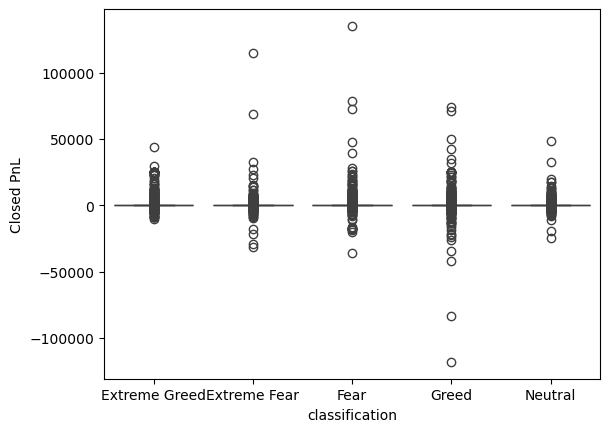

In [17]:
sns.boxplot(x='classification', y='Closed PnL', data=merged)
plt.show()

In [18]:
merged['size_category'] = np.where(
    merged['Size USD'] > merged['Size USD'].median(),
    'High Size',
    'Low Size'
)

In [22]:
merged['win'] = merged['Closed PnL'] > 0

win_rate_sentiment = merged.groupby('classification')['win'].mean().reset_index()
print(win_rate_sentiment)

  classification       win
0   Extreme Fear  0.370607
1  Extreme Greed  0.464943
2           Fear  0.420768
3          Greed  0.384828
4        Neutral  0.396991


In [23]:
trades_sentiment = merged.groupby('classification')['Trade ID'].count().reset_index()
print(trades_sentiment)

  classification  Trade ID
0   Extreme Fear     21400
1  Extreme Greed     39992
2           Fear     61837
3          Greed     50303
4        Neutral     37686


In [24]:
size_sentiment = merged.groupby('classification')['Size USD'].mean().reset_index()
print(size_sentiment)

  classification     Size USD
0   Extreme Fear  5349.731843
1  Extreme Greed  3112.251565
2           Fear  7816.109931
3          Greed  5736.884375
4        Neutral  4782.732661


In [25]:
long_short = merged.groupby(['classification','Side']).size().unstack()
print(long_short)

Side              BUY   SELL
classification              
Extreme Fear    10935  10465
Extreme Greed   17940  22052
Fear            30270  31567
Greed           24576  25727
Neutral         18969  18717


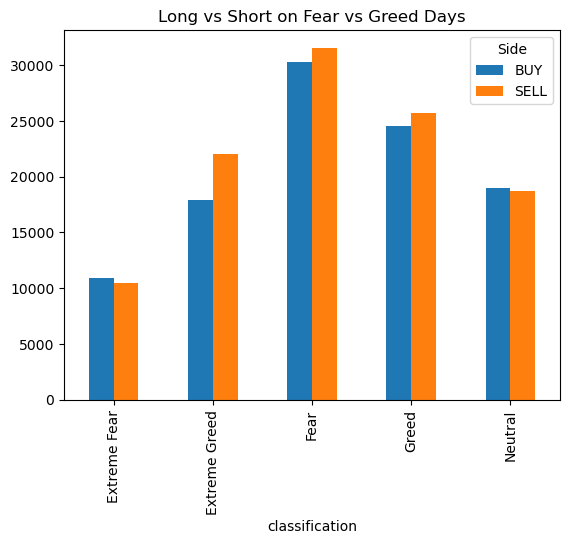

In [26]:
long_short.plot(kind='bar')
plt.title("Long vs Short on Fear vs Greed Days")
plt.show()

In [27]:
volatility = merged.groupby('classification')['Closed PnL'].std().reset_index()
print(volatility)

  classification   Closed PnL
0   Extreme Fear  1136.056091
1  Extreme Greed   766.828294
2           Fear   935.355438
3          Greed  1116.028390
4        Neutral   517.122220


In [28]:
fee_compare = merged.groupby('classification')['Fee'].mean().reset_index()
print(fee_compare)

  classification       Fee
0   Extreme Fear  1.116291
1  Extreme Greed  0.675902
2           Fear  1.495172
3          Greed  1.254372
4        Neutral  1.044798


In [29]:
median_size = merged['Size USD'].median()

merged['Trader Type'] = merged['Size USD'].apply(
    lambda x: 'High Size' if x > median_size else 'Low Size'
)

In [30]:
seg_perf = merged.groupby(['Trader Type','classification'])['Closed PnL'].mean().reset_index()
print(seg_perf)

  Trader Type classification  Closed PnL
0   High Size   Extreme Fear   61.196379
1   High Size  Extreme Greed  140.570044
2   High Size           Fear   97.025581
3   High Size          Greed   84.301244
4   High Size        Neutral   69.581271
5    Low Size   Extreme Fear    1.157202
6    Low Size  Extreme Greed    9.628661
7    Low Size           Fear    3.580906
8    Low Size          Greed    3.609685
9    Low Size        Neutral    2.188668


In [31]:
trade_count = merged.groupby('Account')['Trade ID'].count()

threshold = trade_count.median()

merged['Frequency Type'] = merged['Account'].map(
    lambda x: 'Frequent' if trade_count[x] > threshold else 'Rare'
)

In [32]:
freq_perf = merged.groupby(['Frequency Type','classification'])['Closed PnL'].mean().reset_index()
print(freq_perf)

  Frequency Type classification  Closed PnL
0       Frequent   Extreme Fear   34.163353
1       Frequent  Extreme Greed   62.870911
2       Frequent           Fear   51.323784
3       Frequent          Greed   25.004641
4       Frequent        Neutral   34.579701
5           Rare   Extreme Fear   35.941979
6           Rare  Extreme Greed  103.264685
7           Rare           Fear   80.835791
8           Rare          Greed  210.210287
9           Rare        Neutral   31.845656


In [33]:
account_winrate = merged.groupby('Account')['win'].mean()

winner_threshold = 0.6

merged['Trader Quality'] = merged['Account'].map(
    lambda x: 'Consistent Winner' if account_winrate[x] > winner_threshold else 'Inconsistent'
)

In [34]:
quality_perf = merged.groupby(['Trader Quality','classification'])['Closed PnL'].mean().reset_index()
print(quality_perf)

      Trader Quality classification  Closed PnL
0  Consistent Winner   Extreme Fear   81.243158
1  Consistent Winner  Extreme Greed   55.005705
2  Consistent Winner           Fear   29.666031
3  Consistent Winner          Greed   36.645300
4  Consistent Winner        Neutral   -1.780025
5       Inconsistent   Extreme Fear   33.837859
6       Inconsistent  Extreme Greed   69.258164
7       Inconsistent           Fear   54.971352
8       Inconsistent          Greed   43.078366
9       Inconsistent        Neutral   35.766292
